In [30]:
import pandas as pd
import scipy as sc
import matplotlib.pyplot as plt
import numpy as np 
import pickle
import seaborn as sns
import tensorflow as tf

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
#import library keras
from keras.models import Sequential 
from keras.layers import Dense
from keras.layers import LSTM 
from tensorflow.keras import layers
from keras.layers import Dropout


In [31]:
url="F:\SKRIPSI\DATASET\datasettma.csv"

In [32]:
dt=pd.read_csv(url,sep=";", decimal=",")

In [33]:
dt.axes

[RangeIndex(start=0, stop=1095, step=1),
 Index(['Tgl ', 'Max', 'Min', 'Rata2', 'Penguapan ( mm )', 'Anemometer',
        'Penyinaran ', 'Radiasi', 'Curah', 'Muka Air'],
       dtype='object')]

In [34]:
dt.dtypes

Tgl                  object
Max                   int64
Min                   int64
Rata2               float64
Penguapan ( mm )    float64
Anemometer          float64
Penyinaran          float64
Radiasi             float64
Curah               float64
Muka Air            float64
dtype: object

In [35]:
dt.shape

(1095, 10)

In [36]:
dt.describe()

,Max,Min,Rata2,Penguapan ( mm ),Anemometer,Penyinaran,Radiasi,Curah,Muka Air
count,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1092.000000,1060.000000
mean,39.952511,23.210959,31.581735,10.490502,7.957991,42.198484,135.995087,5.504579,0.934632
std,3.889179,3.115138,2.983874,18.275630,4.782967,21.383127,91.067422,14.457575,2.046215
min,29.000000,10.000000,24.500000,0.000000,0.800000,0.000000,0.000000,0.000000,0.000000
25%,37.000000,21.000000,30.000000,4.000000,5.500000,26.720000,70.190000,0.000000,0.000000
50%,39.000000,23.000000,31.000000,5.000000,7.000000,44.410000,122.840000,0.000000,0.300000
75%,43.000000,24.000000,32.000000,6.000000,8.900000,60.170000,187.180000,3.125000,1.000000
max,50.000000,36.000000,42.500000,187.500000,60.800000,113.060000,701.930000,145.800000,20.400000


In [37]:
dt=dt.replace(0, np.NaN)
dt.isnull().sum()

Tgl                   0
Max                   0
Min                   0
Rata2                 0
Penguapan ( mm )     42
Anemometer            0
Penyinaran           33
Radiasi              69
Curah               641
Muka Air            318
dtype: int64

plot correlation matrix


In [38]:
 Var_Corr = dt.corr()

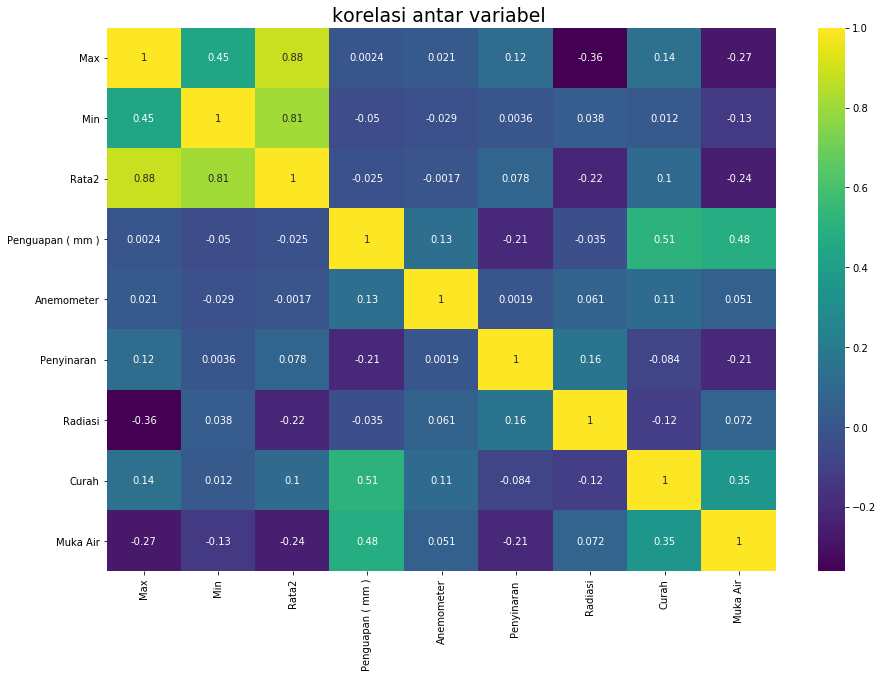

In [39]:
plt.figure(figsize=(15,10))
sns.heatmap(dt.corr(),annot=True,cmap='viridis')
plt.title('korelasi antar variabel ',fontsize =19)
plt.show()

In [40]:
col_=dt.columns.tolist()[2:]

In [41]:
X= dt[col_].drop('Muka Air',1)
Y= dt['Muka Air']

In [42]:
print(X)

      Min  Rata2  Penguapan ( mm )  Anemometer  Penyinaran   Radiasi  Curah
0      24   29.5               1.2        12.6        39.07   245.68    0.2
1      24   30.0             120.5         9.9        24.50   163.78   62.5
2      24   28.5               3.6         5.5        23.84   204.73    1.6
3      25   30.5              37.0         5.8          NaN    81.89   17.0
4      24   30.5               5.5        19.8        25.83   333.42    0.5
...   ...    ...               ...         ...          ...      ...    ...
1090   33   41.5               6.0        11.3        72.28      NaN    NaN
1091   33   41.5               5.0         7.7        67.64   163.78    NaN
1092   33   41.5               4.0         8.9        68.30   456.25    NaN
1093   33   41.5               5.0         7.1        75.60    35.10    NaN
1094   33   41.5               5.0        37.2        70.29    35.10    NaN

[1095 rows x 7 columns]


In [43]:
print(Y)

0       1.00
1       4.00
2       0.80
3       2.00
4       3.00
        ... 
1090    0.21
1091    0.19
1092    0.18
1093    0.19
1094    0.18
Name: Muka Air, Length: 1095, dtype: float64


normalisasi data

In [44]:
sc=MinMaxScaler(feature_range=(0,1))
training_set=dt.iloc[:,1:2].values
training_set_scaled=sc.fit_transform(training_set)

membagi data train dan test

In [45]:
X_train, X_test, Y_train,Y_test = train_test_split(X, Y, 
                          test_size = 0.3, 
                          random_state = 0)

In [46]:
print("jumlah data train =", X_train.shape)
print("jumlah data test =", X_test.shape)

jumlah data train = (766, 7)
jumlah data test = (329, 7)


In [47]:
training_set=dt.iloc[:,1:9].values

In [48]:
testing_set=dt.iloc[:,1:9].values

creating a data structure with 60 timesteps and 1 output

In [49]:
X_train=[]
Y_train=[]
for i in range (60,1095):
    X_train.append(training_set_scaled[i-60:i,0])
    Y_train.append(training_set_scaled[i,0])
X_train,Y_train=np.array(X_train),np.array(Y_train)


reshaping = membentuk kembali 

In [50]:
X_train=np.reshape(X_train,(X_train.shape[0],
                    X_train.shape[1],1))

inisialising the RNN 

In [61]:
regressor=Sequential(shape=1090)
layers.Dense(20,activation="relu")(regressor)


TypeError: __init__() got an unexpected keyword argument 'shape'

##### adding the first lstm layer and some dropout regulation

In [52]:
regressor.add(LSTM(units =50,
                   return_sequences = True, 
 v                   input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0,2))

In [53]:
regressor.add(LSTM(units=50,
                   return_sequences= True))
regressor.add(Dropout(0,2))

In [54]:
regressor.add(LSTM(units=50,
                   return_sequences= True))
regressor.add(Dropout(0,2))

In [55]:
regressor.add(LSTM(units=50))
regressor.add(Dropout(0,2))

adding the output layer 

In [56]:
regressor.add(Dense(units=1))

compiling the rnn 

In [58]:
regressor.compile(optimizer='adam', 
                  loss='mean_squared_error')

fitting the rnnto the training set

In [59]:
regressor.fit(X_train,  Y_train, epochs =100, batch_size =64)

Epoch 1/100
1035/1035 [==============================] - 6s 6ms/step - loss: 0.0810
Epoch 2/100
1035/1035 [==============================] - 3s 3ms/step - loss: 0.0143
Epoch 3/100
1035/1035 [==============================] - 4s 4ms/step - loss: 0.0086
Epoch 4/100
1035/1035 [==============================] - 4s 4ms/step - loss: 0.0053
Epoch 5/100
1035/1035 [==============================] - 4s 4ms/step - loss: 0.0047
Epoch 6/100
1035/1035 [==============================] - 5s 4ms/step - loss: 0.0052
Epoch 7/100
1035/1035 [==============================] - 4s 4ms/step - loss: 0.0046
Epoch 8/100
1035/1035 [==============================] - 4s 4ms/step - loss: 0.0048
Epoch 9/100
1035/1035 [==============================] - 4s 4ms/step - loss: 0.0046
Epoch 10/100
1035/1035 [==============================] - 5s 4ms/step - loss: 0.0048
Epoch 11/100
1035/1035 [==============================] - 5s 5ms/step - loss: 0.0048
Epoch 12/100
1035/1035 [==============================] - 4s 4ms/step - lo

1035/1035 [==============================] - 3s 3ms/step - loss: 0.0034
Epoch 98/100
1035/1035 [==============================] - 3s 3ms/step - loss: 0.0039
Epoch 99/100
1035/1035 [==============================] - 3s 3ms/step - loss: 0.0036
Epoch 100/100
1035/1035 [==============================] - 3s 3ms/step - loss: 0.0034


In [ ]:
plt.hist(training_set)
plt.hist(testing_set)
plt.show()

In [ ]:
Regression=Sequential()
Reg_model=Regression.fit(X_train, Y_train)